In [1]:
import numpy as np
from tcc_markov_chain.systems import HDPeriodic
from tcc_markov_chain.simulations import MarkovChain, PeriodicDirectSampling
from copy import deepcopy

2025-07-17 18:00:14,159 - INFO - creting system with 4 particles of radii 1
2025-07-17 18:00:14,161 - INFO - density: 0.3490658503988659, box size [6. 6.]
2025-07-17 18:00:14,162 - INFO - system created


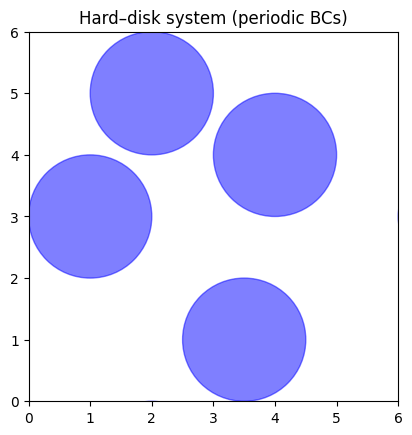

[ 2.  4. -2. -1.]
[[4.  5. ]
 [5.  3. ]
 [2.  4. ]
 [2.5 1. ]]


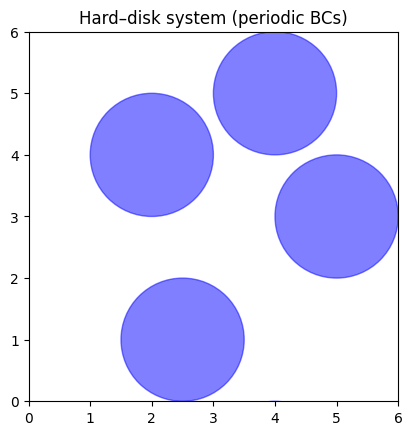

In [194]:
box_dimension=np.array([6,6],dtype=float)
n_particles=4
particle_radius=1
positions = np.array([[2,5], [1,3], [4,4],[3.5,1]],dtype=float)
sys = HDPeriodic(
    particle_radius=particle_radius,
    n_particles=n_particles,
    box_dimension=box_dimension,
    # initial_configuration_type='hexagonal_lattice'
    positions=positions
)
sys.plot_system()

simmetry = box_dimension[0] / 2
pos_copy = deepcopy(sys.positions)
move = 2*(simmetry - pos_copy[:,0])
print(move)
# Apply symmetry transformation
sys.positions[:,0] = (sys.positions[:,0] + move) % box_dimension[0]
print(sys.positions)
sys.plot_system()

In [ ]:
from tcc_markov_chain.simulations import Simulation
import matplotlib.pyplot as plt


  0%|          | 0/10 [00:44<?, ?it/s]


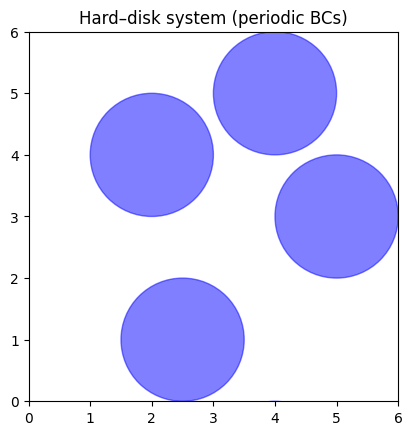

In [196]:
sim_test = PeriodicCluster(system=deepcopy(sys), symmetry_axis=simmetry)
sim_run = sim_test.run(n_steps=10, eval_fn=lambda x: x.plot_system())
sim_test.system.plot_system()

(array([0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 4]), array([1, 2, 3, 4, 5, 2, 3, 4, 5, 3, 4, 5, 4, 5, 5]))


  0%|          | 0/10 [00:00<?, ?it/s]

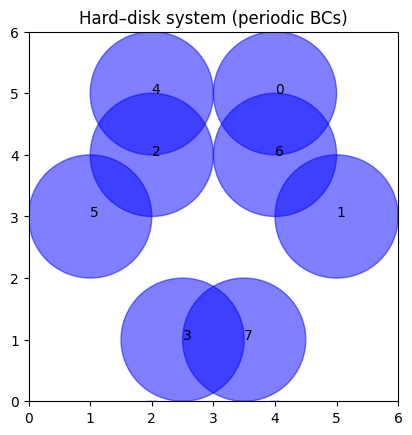

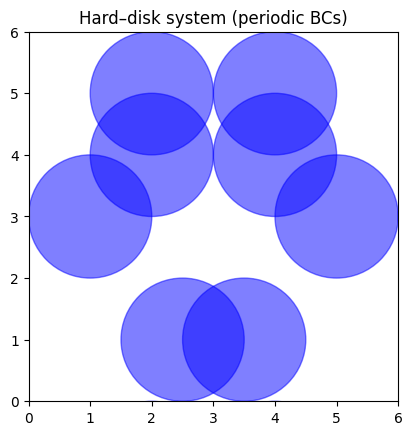

In [197]:
print(np.triu_indices(6,k=1))
next(sim_run)